<h1><center> Network/Graph Analysis in Python </center></h1>

**NetworkX**: Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Installation: 
`$ pip install networkx`


**nxviz**: network visualization package

Installation:
`$ pip install nxviz`


If already installed, to upgrade to latest versions: `$ pip install networkx --upgrade` and `$ pip install nxviz --upgrade`

**Some open source network data locations:**

* **graph examples embedded in NetworkX:**
    * Zachary's Karate Club: `nx.karate_club_graph()`
    * Davis Southern women social network: `nx.davis_southern_women_graph()`
    *  Florentine families: `nx.florentine_families_graph()`
    * more examples: https://networkx.github.io/documentation/networkx-1.9/examples/index.html
* **The Koblenz Network Collection**: http://konect.uni-koblenz.de/
* **Stanford Large Network Dataset Collection**: https://snap.stanford.edu/data/


**To learn the basics of Network Science: http://networksciencebook.com/**


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import networkx as nx
import nxviz as nv
%matplotlib inline

In [2]:
# check version 
print('NetworkX: ', nx.__version__)
print('nxviz: ', nv.__version__)

NetworkX:  2.5.1
nxviz:  0.3.6


## I. Networks Basics

**Nodes**: can represent anything (images, webpage URL links, people, power stations, numbers, words, etc.)

**Edges**: represent relationships between nodes

### 1. Create & Manipulate Networks 

In [3]:
# create empty network
G = nx.Graph()

In [4]:
# add one node with label '1'
G.add_node(1)

In [5]:
# add nodes from a list of elements
G.add_nodes_from(['Mary', 4, 'Alice', 'Mary'])

In [6]:
# remove node
G.remove_node('Mary')

In [7]:
# remove multiple nodes
G.remove_nodes_from(['Mary', 1])

In [8]:
# view nodes in network G
G.nodes

NodeView((4, 'Alice'))

In [9]:
# add single edge - tuple of nodes (source, target)
# this also adds nodes if they don't already exist
G.add_edge('Mary','Steven')

In [10]:
G.nodes

NodeView((4, 'Alice', 'Mary', 'Steven'))

In [11]:
# add multiple of edges (list of tuples)
G.add_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [12]:
# view edges in network G
G.edges

EdgeView([('Alice', 'Mary'), ('Mary', 'Steven')])

In [13]:
# remove edge
G.remove_edge('Mary','Alice')

In [14]:
# remove multiple edges (list of tuples)
G.remove_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [15]:
# empty the network
G.clear()

**Load network from pandas dataframe.**

In [18]:
df = pd.read_csv('../datafiles/social/facebook/facebook_clean_data/politician_edges.csv')

In [19]:
df.head()

,#node_1,node_2
0,0,1972
1,0,5111
2,0,138
3,0,3053
4,0,1473


In [20]:
# load graph from pandas dataframe
G = nx.from_pandas_edgelist(df, source='#node_1', target='node_2', create_using=nx.Graph())

In [21]:
len(G.nodes)

5908

In [22]:
len(G.edges)

41729

In [23]:
# graph edgelist to pandas dataframe
df_g = nx.to_pandas_edgelist(G)

In [24]:
df_g.head()

,source,target
0,0,1972
1,0,5111
2,0,138
3,0,3053
4,0,1473


**Load network from file.** 

You can read/write a graph in a file using common graph formats (edge lists, adjacency lists, GML, GraphML, pickle, LEDA, etc.).

To see how to read different types of adjancency formats, check here: https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.html

### 2. Social Networks - Physicians 

In [25]:
# load physicians network
G = nx.read_edgelist("../datafiles/social/physicians/out.moreno_innovation_innovation", comments='%')
#G = nx.from_pandas_edgelist(df)

In [26]:
# get number of nodes in network G
G.number_of_nodes()

241

In [27]:
# get number of nodes in network G
len(G.nodes)

241

In [28]:
# get number of edges in network G
G.number_of_edges()

923

In [29]:
# get number of edges in network G
len(G.edges)

923

In [30]:
# get number of neighbors (connections) of a specified node
G.degree('151')

10

In [31]:
G.nodes

NodeView(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157',

In [32]:
# get the 2nd node's neighbors (retrieves a dictionary)
dict_neighbors = G.neighbors('2')

In [33]:
# output edgelist to file
nx.write_edgelist(G,'physician.edgelist')
#nx.to_pandas_edgelist(G)

### 2. Network Types 

#### a. Weighted Graphs

**Edge weight:** quantifies the strength of the connection

In [34]:
# assign weight to edge
G.add_edge('Mary','Steven', weight=0.6)

In [35]:
G.edges

EdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('1', '7'), ('1', '72'), ('2', '39'), ('2', '40'), ('2', '10'), ('2', '41'), ('2', '11'), ('2', '42'), ('2', '110'), ('3', '9'), ('3', '101'), ('3', '67'), ('3', '41'), ('3', '11'), ('3', '42'), ('3', '112'), ('3', '91'), ('4', '59'), ('4', '22'), ('4', '32'), ('4', '109'), ('4', '104'), ('4', '116'), ('4', '46'), ('4', '74'), ('4', '6'), ('4', '5'), ('4', '55'), ('5', '8'), ('5', '89'), ('5', '39'), ('5', '85'), ('5', '9'), ('5', '66'), ('5', '45'), ('5', '69'), ('5', '91'), ('5', '6'), ('5', '38'), ('6', '31'), ('6', '32'), ('6', '109'), ('7', '102'), ('8', '9'), ('8', '10'), ('8', '11'), ('8', '12'), ('9', '40'), ('9', '53'), ('9', '10'), ('9', '66'), ('9', '82'), ('9', '89'), ('9', '85'), ('9', '41'), ('9', '69'), ('9', '11'), ('9', '70'), ('10', '45'), ('10', '83'), ('10', '54'), ('10', '67'), ('10', '94'), ('10', '89'), ('10', '91'), ('10', '108'), ('10', '77'), ('10', '38'), ('10', '70'), ('10', '102'), ('11',

In [36]:
# access edge properties
G['Mary']['Steven']

{'weight': 0.6}

In [37]:
# change edge weight
G['Mary']['Steven']['weight'] = 1

#### b. Directed Graphs

**Edge direction:** describes source -> target node relationship

In [38]:
#undirected
G.nodes

NodeView(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157',

In [39]:
dg = nx.DiGraph()

In [40]:
# you can create an undirected representation of network G
nx.to_undirected(dg)

In [41]:
# you can create a directed representation of network G
dg = nx.to_directed(G)

In [42]:
dg.edges

OutEdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('1', '7'), ('1', '72'), ('2', '1'), ('2', '39'), ('2', '40'), ('2', '10'), ('2', '41'), ('2', '11'), ('2', '42'), ('2', '110'), ('3', '1'), ('3', '9'), ('3', '101'), ('3', '67'), ('3', '41'), ('3', '11'), ('3', '42'), ('3', '112'), ('3', '91'), ('4', '1'), ('4', '59'), ('4', '22'), ('4', '32'), ('4', '109'), ('4', '104'), ('4', '116'), ('4', '46'), ('4', '74'), ('4', '6'), ('4', '5'), ('4', '55'), ('5', '1'), ('5', '8'), ('5', '89'), ('5', '39'), ('5', '85'), ('5', '9'), ('5', '66'), ('5', '45'), ('5', '4'), ('5', '69'), ('5', '91'), ('5', '6'), ('5', '38'), ('6', '1'), ('6', '31'), ('6', '32'), ('6', '109'), ('6', '4'), ('6', '5'), ('7', '1'), ('7', '102'), ('8', '9'), ('8', '10'), ('8', '5'), ('8', '11'), ('8', '12'), ('9', '8'), ('9', '40'), ('9', '53'), ('9', '10'), ('9', '3'), ('9', '66'), ('9', '82'), ('9', '89'), ('9', '85'), ('9', '41'), ('9', '5'), ('9', '69'), ('9', '11'), ('9', '70'), ('10', '8'), ('10

#### c. Multigraphs

Many algorithms are not well defined on such graphs. Therefore, you should convert such graphs rather to a standard graph in a way that makes the measurement well defined.

In [43]:
# multigraphs can store multiple edges information between same two nodes that can have different properties
MG = nx.MultiGraph()
#MG = nx.MultiDiGraph()
MG.add_weighted_edges_from([(1, 2, 3.0), (1, 2, 75), (2, 3, 5), (1, 2, 4)])

In [44]:
# lists the edges (node1, node2, edge_index), including the multiedges, adding the multiedge index as 3rd element in edge tuple
MG.edges

MultiEdgeView([(1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 3, 0)])

In [45]:
# lists the edges (node1, node2, weight/edge_attribute), the 3rd element is the weights of the edges
MG.edges.data('weight')

MultiEdgeDataView([(1, 2, 3.0), (1, 2, 75), (1, 2, 4), (2, 3, 5)])

In [46]:
MG.edges.data()

MultiEdgeDataView([(1, 2, {'weight': 3.0}), (1, 2, {'weight': 75}), (1, 2, {'weight': 4}), (2, 3, {'weight': 5})])

In [47]:
# check the weight of an edge
MG[1][2]

AtlasView({0: {'weight': 3.0}, 1: {'weight': 75}, 2: {'weight': 4}})

#### d. Bipartite Network

Bipartite graphs B = (U, V, E) have two node sets U, V and edges in E that only connect nodes from opposite sets.

Taken from NetworkX documentation:
* NetworkX does not have a custom bipartite graph class 
* Graph() or DiGraph() classes can be used to represent bipartite graphs 
* you have to keep track of which set each node belongs to, and make sure that there is no edge between nodes of the same set 
* convetion: use a node attribute named *bipartite* with values 0 or 1 to identify the sets each node belongs to. This convention is not enforced in the source code of bipartite functions, it’s only a recommendation.

For more details: https://networkx.github.io/documentation/stable/reference/algorithms/bipartite.html

<img src="../images/Simple-bipartite-graph.svg.png" alt="Data" style="width: 300px;"/>

In [48]:
from networkx.algorithms import bipartite

In [49]:
B = nx.Graph()

# add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)

# add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

In [50]:
# check if graph is bipartite
nx.is_bipartite(B)

True

## II. Analysis of Structural Properties

#### 1. Node degree, network average degree, degree distribution

In [51]:
degrees = [deg for node, deg in nx.degree(G)]

In [52]:
# kmin - minimum degree
kmin = np.min(degrees)
print("Minimum degree: ", kmin)

# kmax - maximum degree
kmax = np.max(degrees)
print("Maximum degree: ", kmax)

# kavg - average degree of the network
kavg = np.mean(degrees)
print("Average degree: ", kavg)

Minimum degree:  1
Maximum degree:  28
Average degree:  7.604938271604938


**Degree distribution**: helps us understand connectivity trends in networks and how edges are distributed among nodes (does everyone have similar number of connections, or do we have hubs, nodes with significantly higher number of connections?)

In [53]:
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

In [54]:
dd = degree_distr(G)

In [55]:
plt.figure()
plt.loglog(dd.T[0],dd.T[1],'ro-')
plt.legend(['Physicians'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Physicians')

Text(0.5,1,'Physicians')

#### 2. Paths on networks: average path length, shortest path, longest path

In [56]:
# find shortest path between node1 and node2 in directed & undirected networks 
nx.shortest_path(G, '1', '15')

['1', '2', '40', '15']

In [57]:
# average path length in graph
nx.average_shortest_path_length(G, weight=None)

NetworkXError: Graph is not connected.

#### 3. Clustering coefficient, triangles

In [58]:
# triangles
nx.triangles(G)

{'1': 3,
 '10': 10,
 '100': 6,
 '101': 6,
 '102': 3,
 '103': 4,
 '104': 0,
 '105': 0,
 '106': 1,
 '107': 2,
 '108': 1,
 '109': 7,
 '11': 16,
 '110': 2,
 '111': 3,
 '112': 2,
 '113': 0,
 '114': 0,
 '115': 3,
 '116': 2,
 '117': 6,
 '118': 3,
 '119': 7,
 '12': 17,
 '120': 8,
 '121': 45,
 '122': 1,
 '123': 4,
 '124': 4,
 '125': 12,
 '126': 10,
 '127': 73,
 '128': 35,
 '129': 20,
 '13': 25,
 '130': 8,
 '131': 9,
 '132': 25,
 '133': 13,
 '134': 8,
 '135': 1,
 '136': 9,
 '137': 2,
 '138': 14,
 '139': 0,
 '14': 13,
 '140': 4,
 '141': 14,
 '142': 8,
 '143': 1,
 '144': 13,
 '145': 7,
 '146': 2,
 '147': 1,
 '148': 7,
 '149': 8,
 '15': 43,
 '150': 6,
 '151': 11,
 '152': 6,
 '153': 3,
 '154': 3,
 '155': 6,
 '156': 8,
 '157': 8,
 '158': 10,
 '159': 3,
 '16': 19,
 '160': 7,
 '161': 9,
 '162': 6,
 '163': 5,
 '164': 1,
 '165': 0,
 '166': 7,
 '167': 7,
 '168': 15,
 '169': 5,
 '17': 11,
 '170': 13,
 '171': 10,
 '172': 2,
 '173': 5,
 '174': 4,
 '175': 4,
 '176': 4,
 '177': 2,
 '178': 1,
 '179': 8,
 '18': 

In [59]:
# clustering coefficient of a node
nx.clustering(G, '1')

0.14285714285714285

In [60]:
# clustering coefficient of all nodes (returns a dictionary)
nx.clustering(G)

{'1': 0.14285714285714285,
 '10': 0.09523809523809523,
 '100': 0.21428571428571427,
 '101': 0.21428571428571427,
 '102': 0.14285714285714285,
 '103': 0.19047619047619047,
 '104': 0,
 '105': 0,
 '106': 0.1,
 '107': 0.3333333333333333,
 '108': 0.1,
 '109': 0.25,
 '11': 0.13333333333333333,
 '110': 0.6666666666666666,
 '111': 0.5,
 '112': 0.2,
 '113': 0,
 '114': 0,
 '115': 1.0,
 '116': 0.3333333333333333,
 '117': 1.0,
 '118': 0.2,
 '119': 0.25,
 '12': 0.14166666666666666,
 '120': 0.38095238095238093,
 '121': 0.19480519480519481,
 '122': 1.0,
 '123': 0.4,
 '124': 0.6666666666666666,
 '125': 0.3333333333333333,
 '126': 0.2777777777777778,
 '127': 0.1931216931216931,
 '128': 0.22875816993464052,
 '129': 0.4444444444444444,
 '13': 0.23809523809523808,
 '130': 0.5333333333333333,
 '131': 0.32142857142857145,
 '132': 0.3787878787878788,
 '133': 0.28888888888888886,
 '134': 0.38095238095238093,
 '135': 0.3333333333333333,
 '136': 0.25,
 '137': 0.09523809523809523,
 '138': 0.3888888888888889,
 '1

In [61]:
# clustering coefficient of the network
cc = nx.clustering(G)
avg_clust = sum(cc.values()) / len(cc)
print("Physicians network clustering coefficient:", avg_clust)

Physicians network clustering coefficient: 0.3090107312377949


#### 4. Centrality measures

In [62]:
# degree centrality
nx.degree_centrality(G)

{'1': 0.028925619834710745,
 '10': 0.06198347107438017,
 '100': 0.03305785123966942,
 '101': 0.03305785123966942,
 '102': 0.028925619834710745,
 '103': 0.028925619834710745,
 '104': 0.02066115702479339,
 '105': 0.01652892561983471,
 '106': 0.02066115702479339,
 '107': 0.01652892561983471,
 '108': 0.02066115702479339,
 '109': 0.03305785123966942,
 '11': 0.06611570247933884,
 '110': 0.012396694214876033,
 '111': 0.01652892561983471,
 '112': 0.02066115702479339,
 '113': 0.012396694214876033,
 '114': 0.008264462809917356,
 '115': 0.012396694214876033,
 '116': 0.01652892561983471,
 '117': 0.01652892561983471,
 '118': 0.024793388429752067,
 '119': 0.03305785123966942,
 '12': 0.06611570247933884,
 '120': 0.028925619834710745,
 '121': 0.09090909090909091,
 '122': 0.008264462809917356,
 '123': 0.02066115702479339,
 '124': 0.01652892561983471,
 '125': 0.0371900826446281,
 '126': 0.0371900826446281,
 '127': 0.11570247933884298,
 '128': 0.0743801652892562,
 '129': 0.04132231404958678,
 '13': 0.061

In [63]:
# betweenness centrality of network
nx.betweenness_centrality(G)

{'1': 0.0025873306027998973,
 '10': 0.007922481971836483,
 '100': 0.0018370581217461216,
 '101': 0.0028833829001377285,
 '102': 0.0036062404601618354,
 '103': 0.0016825300909690027,
 '104': 0.001992078319091967,
 '105': 0.0005081719607944731,
 '106': 0.0007585490614348925,
 '107': 0.00028306308277830755,
 '108': 0.0014925238397547184,
 '109': 0.002148223844907509,
 '11': 0.010493477181625795,
 '110': 0.00011460282395071934,
 '111': 0.00026818350885568807,
 '112': 0.0008283732006620528,
 '113': 0.0003797857857013588,
 '114': 7.100699292325093e-05,
 '115': 0.0,
 '116': 0.0011535802371984711,
 '117': 0.0,
 '118': 0.0007674460274273653,
 '119': 0.0007893830723115307,
 '12': 0.009206447225239047,
 '120': 0.000638375384882526,
 '121': 0.006709229234033611,
 '122': 0.0,
 '123': 8.589547614272417e-05,
 '124': 2.0454190407209847e-05,
 '125': 0.0014895424943123193,
 '126': 0.0010512848390939098,
 '127': 0.009653009425347327,
 '128': 0.004541156978776968,
 '129': 0.00044482435175484104,
 '13': 0.

In [64]:
# closeness centrality of network
nx.closeness_centrality(G)

{'1': 0.1770805916723693,
 '10': 0.20593816957453323,
 '100': 0.19239898195544625,
 '101': 0.19578628797578862,
 '102': 0.19042228008604098,
 '103': 0.1841169065732582,
 '104': 0.17994597341464066,
 '105': 0.17878876458239218,
 '106': 0.18230592060696382,
 '107': 0.1649949726561542,
 '108': 0.18784900603082422,
 '109': 0.19173553719008266,
 '11': 0.22152711468176878,
 '110': 0.15445362718089992,
 '111': 0.17821572367026914,
 '112': 0.1649949726561542,
 '113': 0.16798581808194554,
 '114': 0.1519216005058032,
 '115': 0.1737603305785124,
 '116': 0.17595982843393662,
 '117': 0.14867194060193575,
 '118': 0.0861141431467332,
 '119': 0.09815160401670665,
 '12': 0.220648038829857,
 '120': 0.09710743801652892,
 '121': 0.1250424544322427,
 '122': 0.06761554943373126,
 '123': 0.07244523153614063,
 '124': 0.07131327479338842,
 '125': 0.09815160401670665,
 '126': 0.09037721954013583,
 '127': 0.13830453293263212,
 '128': 0.11554555915890782,
 '129': 0.10030878212696395,
 '13': 0.20593816957453323,
 

#### 5. Components

In [65]:
# checks whether the network is connected
nx.is_connected(G)

False

In [66]:
# find number of connected components
nx.number_connected_components(G)

5

In [67]:
# get the nodes in the same component as *n*
nx.node_connected_component(G, '1')

{'1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99'}

#### 6. Assortativity

* Pearson correlation coefficient [-1; 1]
* social networks are highly assortative (homophily): high degree nodes connect to other high degree nodes
* technological are disassortative: high degree nodes connect to low degree nodes

Assortativity computed based on:
* degree
* attribute

In [68]:
# check assortativity of network
nx.assortativity.degree_pearson_correlation_coefficient(G)

-0.05215189832989768

In [69]:
nx.degree_assortativity_coefficient(G)

-0.052151898329897854

In [70]:
# check assortativity (mixing) by a particular attribute
nx.attribute_assortativity_coefficient(G, attribute)

NameError: name 'attribute' is not defined

## III. Network Visualization

Disclaimer: visualizations can be pretty and insightful, however for large networks they tend to be just pretty! Knowing how to compute network measures is the key!

* visualization with NetworkX: *"NetworkX provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package."*

* nxviz
* Matplotlib or Graphviz with pydot (import and export NetworkX graphs in Graphviz dot format using pydot)
* Gephi
* Graphviz
* Neo4j
* D3
* etc.

#### 1. Basic drawing methods in NetworkX module: 
* `nx.draw()`
* `nx.draw_random()`
* `nx.draw_spectral()`
* `nx.draw_circular()`
* `nx.draw_spring()`
* `nx.draw_shell()`

In [71]:
# nxviz package provides some nice visualization options
import nxviz as nv

In [72]:
nx.draw(G, node_size=10)

In [73]:
nx.draw_random(G)

In [74]:
nx.draw_spectral(G)

In [75]:
nx.draw_circular(G, edge_color='blue', node_size=10)

#### Visualize subgraphs

In [76]:
# assign selected subgraph to a new graph
nodes = list(G.neighbors('10'))
nodes.append('10')
G_sub = G.subgraph(nodes)

In [77]:
# drawing options: set node size, color, labels, etc. (check documentation for more)
nx.draw(G_sub, node_size=50, node_color='y', with_labels=True)

#### Visualize with Nxviz

In [78]:
nv.CircosPlot(G).draw()

In [79]:
nv.ArcPlot(G).draw()

In [80]:
nv.MatrixPlot(G).draw()

#### Network with node attributes

* how to import node attributes located in a separate file

In [81]:
# lexical network: David Copperfield
G_lex = nx.read_edgelist("../datafiles/lexical/david_copperfield/out.adjnoun_adjacency_adjacency", comments='%')

Nodes are listed as numbers, but when visualizing our network, we would like to see the words that represent those nodes. The words are stored in a separate file, in `ent.adjnoun_adjacency_adjacency.word.name`, and the index of the word corresponds to the index of the node. 

In [82]:
# load node name data for each node in the network
with open("../datafiles/lexical/david_copperfield/ent.adjnoun_adjacency_adjacency.word.name") as file:
    node_name = {}
    i = 1 
    for line in file:
        node_name[str(i)] = line.strip()
        i += 1

In [83]:
# assign the name of the node to the node in the graph
nx.set_node_attributes(G_lex, node_name, 'name')

In [84]:
nx.get_node_attributes(G_lex, 'name')

{'1': 'man',
 '10': 'aunt',
 '100': 'possible',
 '101': 'side',
 '102': 'perfect',
 '103': 'poor',
 '104': 'quiet',
 '105': 'same',
 '106': 'strong',
 '107': 'something',
 '108': 'true',
 '109': 'usual',
 '11': 'bad',
 '110': 'family',
 '111': 'world',
 '112': 'year',
 '12': 'air',
 '13': 'boy',
 '14': 'black',
 '15': 'beautiful',
 '16': 'face',
 '17': 'letter',
 '18': 'little',
 '19': 'young',
 '2': 'agreeable',
 '20': 'best',
 '21': 'course',
 '22': 'friend',
 '23': 'love',
 '24': 'part',
 '25': 'room',
 '26': 'thing',
 '27': 'time',
 '28': 'way',
 '29': 'better',
 '3': 'old',
 '30': 'heart',
 '31': 'mind',
 '32': 'place',
 '33': 'right',
 '34': 'state',
 '35': 'woman',
 '36': 'word',
 '37': 'door',
 '38': 'eye',
 '39': 'bright',
 '4': 'person',
 '40': 'evening',
 '41': 'morning',
 '42': 'certain',
 '43': 'day',
 '44': 'other',
 '45': 'child',
 '46': 'happy',
 '47': 'common',
 '48': 'dark',
 '49': 'kind',
 '5': 'short',
 '50': 'night',
 '51': 'dear',
 '52': 'good',
 '53': 'home',
 '5

In [85]:
nx.draw(G_lex, labels=node_name, node_color='y')

In [86]:
degrees = [deg for node, deg in nx.degree(G_lex)]

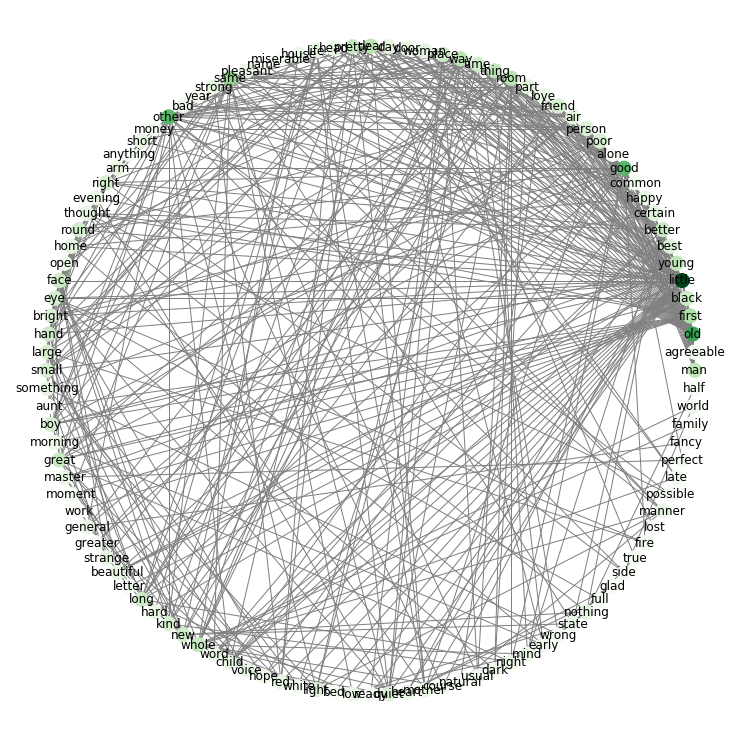

In [91]:
plt.figure(figsize=(10,10))
nx.draw_circular(G_lex, labels=node_name, node_color=degrees, 
                 node_size=200, edge_color='gray', cmap='Greens')

#### Community detection and visualization

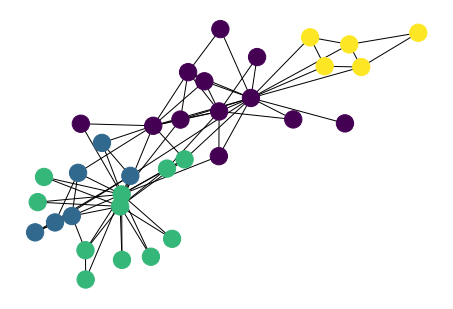

In [90]:
import community as community_louvain
G = nx.karate_club_graph()
partitions = community_louvain.best_partition(G)
nx.draw(G, node_color=list(partitions.values()))

## IV: Network Features for Machine Learning Models

Network features can be incorporated in machine learning algorithms to improve prediction capabilities.  

- structural properties that provide unique features on the node:
    * degree
    * centrality
    * clustering coefficient, etc. 
    
Network topological measures provide additional information that are connectivity dependent, which are additional features for prediction.